*Observations

1.  While there appears to be a lower number of Rural fares, the average fare appears to be higher in those areas.
2. In Urban areas, the average fare was lower, but the drivers appear to make up for the lower fare by sure volume of rides.
3. Suburban drivers seem to be in the best situation, their total rides and fares hover between 25 and 30 percent, while their total drivers is 16.5% meaning that they get more rides and more average fares, and their competition for fares is lower.


In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


city_data = "data/city_data.csv"
ride_data = "data/ride_data.csv"


city = pd.read_csv(city_data)
ride = pd.read_csv(ride_data)

combined_data = pd.merge(ride, city, on="city", how="left")


combined_data.head()
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0, 0, .2)

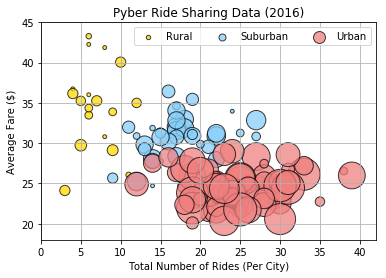

In [2]:
citygroup = combined_data.groupby('city').fare.agg(['mean', 'count'])
citygroup
plot_points = pd.DataFrame(citygroup)
merged_plot_points = pd.merge(plot_points, city, on="city", how="inner")
urban_df = merged_plot_points.loc[merged_plot_points["type"] == "Urban" , :]
suburban_df = merged_plot_points.loc[merged_plot_points["type"] == "Suburban" , :]
rural_df = merged_plot_points.loc[merged_plot_points["type"] == "Rural" , :]

ax1 = rural_df.plot(kind='scatter', x='count', y='mean', s= rural_df['driver_count'].values*15, c="gold", Alpha=.75, edgecolors="black", label="Rural")
ax = suburban_df.plot(kind='scatter', x='count', y='mean', s= suburban_df['driver_count'].values*15, c="lightskyblue", Alpha=.75, edgecolors="black", label="Suburban", ax=ax1)
urban_df.plot(kind="scatter", x='count', y='mean', s=urban_df['driver_count'].values*15, c="lightcoral", Alpha=.75, edgecolors="black", grid=True, label="Urban", title="Pyber Ride Sharing Data (2016)", ax=ax)
plt.ylim(18,45,5)
plt.xlim(0,42,5)
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.legend(numpoints=1, loc='upper right', ncol=3, markerscale=.5)
plt.savefig("Images/RideSharingDataScatter.png")

plt.show()


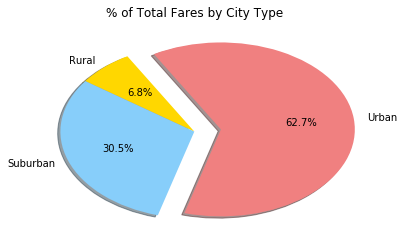

In [3]:
fare_total = combined_data.groupby('type').fare.sum()
fare_df = pd.DataFrame(fare_total)
fare_df.reset_index(inplace=True)

plt.title('% of Total Fares by City Type')
plt.pie(fare_df['fare'], labels=fare_df['type'], colors=colors, autopct="%1.1f%%", explode=explode, shadow=True, startangle=120)
plt.savefig("Images/RideSharingDataPieTotalFares.png")
plt.show()


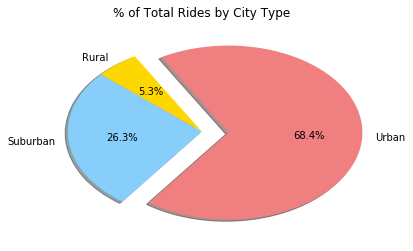

In [4]:
ride_total = combined_data.groupby('type').fare.count()
ride_df = pd.DataFrame(ride_total)
ride_df.reset_index(inplace=True)

plt.title('% of Total Rides by City Type')
plt.pie(ride_df['fare'], labels=ride_df['type'], colors=colors, autopct="%1.1f%%", explode=explode, shadow=True, startangle=120)
plt.savefig("Images/RideSharingDataTotalRides.png")
plt.show()


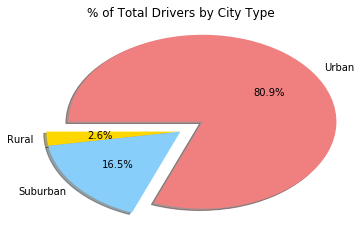

In [5]:
city_pd = pd.DataFrame(city)
driver_gb = city_pd.groupby('type').driver_count.sum()
driver_df = pd.DataFrame(driver_gb)
driver_df.reset_index(inplace=True)


plt.title('% of Total Drivers by City Type')
plt.pie(driver_df['driver_count'], labels=driver_df['type'], colors=colors, autopct="%1.1f%%", explode=explode, shadow=True, startangle=180)
plt.savefig("Images/RideSharingDataTotalDrivers.png")
plt.show()
